In [4]:
import pandas as pd
import spacy
import csv

In [5]:
class corpus(object):
    def __init__(self, filename):
      self.filename = filename
      self.nlp = spacy.blank('en')
    def __iter__(self):
      with open(self.filename, 'r') as f:
        reader = csv.reader(f,delimiter = ',')
        for _,row in reader:
          yield [t.text.lower() for t in self.nlp(row)]

documents = corpus('arxiv.csv')

In [6]:
import gensim

model = gensim.models.Word2Vec(documents, min_count=100, window=5, vector_size=100)

In [7]:
model.wv['nlp']

array([ 2.0285122 , -1.5882745 ,  1.8597745 , -0.78512007,  1.1818981 ,
       -0.09548432,  1.5496348 ,  0.12828158, -1.3803983 ,  2.0425732 ,
        0.846944  , -2.4154615 ,  0.68528914,  0.08432793,  0.12435407,
        1.6149876 , -1.6460819 ,  2.3387632 ,  0.21552478,  2.6786032 ,
        1.3112458 , -0.19591972,  0.81798357,  0.25578377, -2.710172  ,
       -1.0023966 ,  1.1525247 , -0.88015157,  2.3588917 , -1.5742806 ,
        1.5298648 , -0.20446593,  1.0367696 ,  0.59286034,  0.6252731 ,
       -0.77063954, -0.90883905, -3.5983415 , -0.0380248 ,  1.7740556 ,
       -1.2438189 , -1.1606784 ,  2.7409916 , -0.75087154, -2.6011324 ,
        0.0458087 ,  0.9354414 ,  1.0715952 ,  1.1975967 , -2.6792383 ,
        1.269111  ,  0.99115986,  0.32150325, -0.15695147, -0.59892595,
        0.7452759 , -0.23510699,  1.2618333 ,  3.1883154 ,  0.74004453,
       -0.42414835,  2.4606671 , -1.7818719 ,  0.79091364, -0.26873612,
        0.74246866, -0.6474026 , -2.4061773 ,  0.7866581 , -0.75

In [8]:
model.wv['cnn']

array([ 0.42932594, -0.4982617 ,  1.0420755 ,  0.24918418, -0.27143535,
        2.4435575 ,  0.6745489 , -1.0799291 ,  0.09101628,  0.27217296,
       -0.8601433 , -0.9666952 ,  0.25675213,  1.8797562 , -2.6431484 ,
        0.25484097, -2.1387775 ,  0.95049196,  0.4678164 ,  1.8615631 ,
       -0.30223754,  2.970945  ,  0.6646558 ,  0.03920855,  0.12100771,
        1.3084589 , -1.8579912 , -0.09471947,  1.3775196 , -0.40143773,
        0.7315069 , -0.4663712 ,  0.70828676,  1.8729496 ,  0.30487558,
       -0.99533844, -1.7712308 , -0.57711154,  0.9947228 ,  0.1690988 ,
       -0.22133136, -2.702623  , -0.70785147,  0.68157375, -3.248838  ,
        0.02178249,  0.4950446 , -1.5806687 , -0.5495081 , -0.06947801,
       -0.21241824, -0.92504066,  0.730557  , -1.334548  , -0.28238544,
        0.43518597, -0.28627783, -0.23967136, -0.5747905 ,  0.2899978 ,
        0.06801872,  1.5637184 , -0.35126185,  2.1292107 ,  0.9246547 ,
       -0.4953601 ,  0.71880716,  1.4409249 , -1.7604051 ,  0.08

In [9]:
model.wv.similarity('nlp','ml')

0.5204012

In [10]:
model.wv.similar_by_word('nlp')

[('downstream', 0.6375097036361694),
 ('nlu', 0.6045923829078674),
 ('nlg', 0.5886819958686829),
 ('ai', 0.5733489990234375),
 ('mrc', 0.5634216666221619),
 ('ir', 0.5614950060844421),
 ('nli', 0.5571647882461548),
 ('ner', 0.542646050453186),
 ('ml', 0.520401120185852),
 ('gec', 0.512455403804779)]

In [11]:
model.wv.similar_by_word('bert')

[('roberta', 0.7957510948181152),
 ('transformer', 0.7728534936904907),
 ('transformers', 0.707162082195282),
 ('pretrained', 0.69480299949646),
 ('elmo', 0.673590362071991),
 ('gpt-2', 0.6703146696090698),
 ('mbert', 0.6651840209960938),
 ('xlnet', 0.6283897161483765),
 ('xlm', 0.6247227191925049),
 ('lstm', 0.6173388361930847)]

In [12]:
model.wv.most_similar(positive=['nlp','cnn'],negative=['ml'],topn=1)

[('lstm', 0.5274774432182312)]

In [13]:
model.wv.most_similar(positive='tree')

[('trees', 0.7715994715690613),
 ('constituency', 0.7255056500434875),
 ('parse', 0.6880556344985962),
 ('recursive', 0.6646817326545715),
 ('dependency', 0.6500723361968994),
 ('constituent', 0.6251301169395447),
 ('syntax', 0.6156158447265625),
 ('parser', 0.6011903285980225),
 ('grammars', 0.5961393117904663),
 ('hierarchical', 0.5802507400512695)]

In [14]:
print(model.wv.doesnt_match("lstm cnn gru svm transformer".split()))
print(model.wv.doesnt_match("bert word2vec gpt-2 roberta xlnet".split()))
print(model.wv.doesnt_match("word2vec bert glove fasttext elmo".split()))

svm
word2vec
bert


In [18]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

target_word = 'bert'
selected_words = [w[0] for w in model.wv.most_similar(positive=[target_word],topn=200)] + [target_word]
embeddings = [model.wv[w] for w in selected_words] + model.wv[target_word]
tsne = TSNE(n_components=2,metric='cosine', init='pca').fit_transform(embeddings)

In [19]:
tsne

array([[-1.6869496 ,  0.6615831 ],
       [ 6.701565  ,  0.55432993],
       [ 2.6050599 , -0.82525456],
       [-2.889006  , -4.545328  ],
       [-1.1920769 ,  1.1862    ],
       [-0.83089656, -0.29807612],
       [-1.457885  ,  0.07372501],
       [-1.259622  ,  0.5894181 ],
       [-1.9681125 ,  0.76696306],
       [ 6.601438  ,  2.0417726 ],
       [ 1.7219474 ,  0.25110158],
       [ 6.9265556 ,  1.3374037 ],
       [ 4.7910557 ,  2.1029425 ],
       [-2.4171999 , -2.3741417 ],
       [-1.0876313 ,  2.4986908 ],
       [-2.0993066 ,  1.0056565 ],
       [-1.0741607 ,  1.6365557 ],
       [ 6.325233  ,  2.9400914 ],
       [ 3.5494294 , -0.3055555 ],
       [ 4.6899242 ,  1.5921724 ],
       [-1.2384341 , -0.42056987],
       [-1.1368651 ,  2.2979596 ],
       [-3.5484002 , -3.254907  ],
       [ 5.844487  , -1.1759835 ],
       [ 7.8645267 , -0.8261745 ],
       [ 3.5707715 , -1.7714365 ],
       [ 5.1651325 ,  0.35860786],
       [ 5.249795  ,  2.648336  ],
       [ 2.6220775 ,

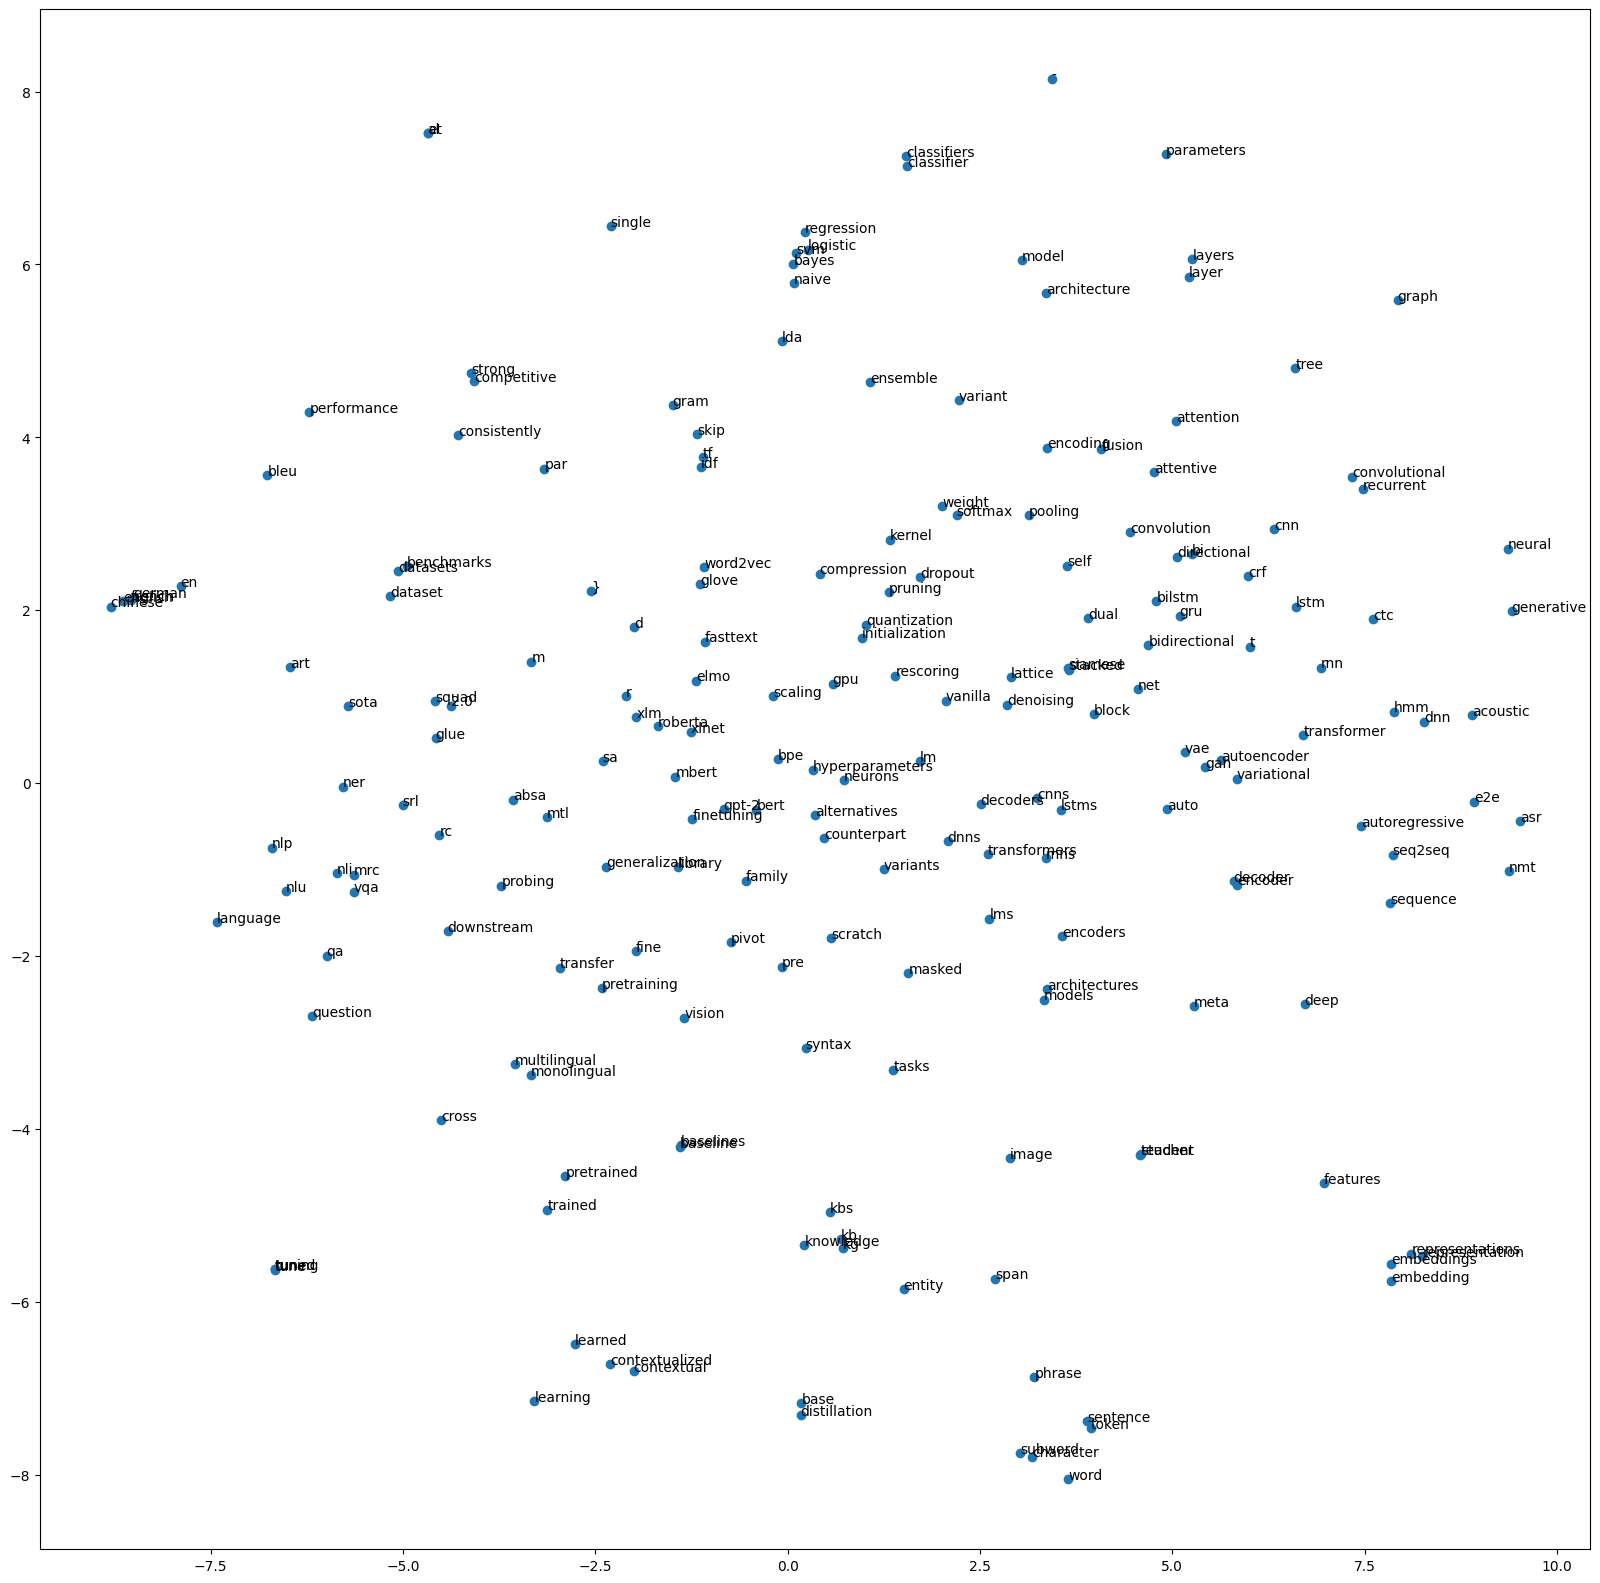

In [20]:
plt.figure(figsize=(20,20))
x=tsne[:,0]
y=tsne[:,1]
plt.scatter(x,y)
for i,word in enumerate(selected_words):
  plt.annotate(word,xy=(x[i],y[i]))
plt.show()

In [22]:
from tqdm.notebook import tqdm

nlp = spacy.load('en_core_web_sm')

word2pos = {}
for word in tqdm(model.wv.key_to_index):
    word2pos[word] = nlp(word)[0].pos_

word2pos["translation"]

  0%|          | 0/3099 [00:00<?, ?it/s]

'NOUN'

In [24]:
import numpy as np

def evaluate(model, word2pos):
  same = 0
  for word in tqdm(model.wv.key_to_index):
    if word2pos[word] == word2pos[model.wv.most_similar(positive=[word],topn=1)[0][0]]:
      same += 1
  return same/len(model.wv.key_to_index)

evaluate(model, word2pos)

  0%|          | 0/3099 [00:00<?, ?it/s]

0.6450467892868668

In [27]:
sizes = [100,200,300]
windows = [2,5,10]

df = pd.DataFrame(index=windows, columns=sizes)

for s in sizes:
  for w in windows:
    print(s,w)
    model = gensim.models.Word2Vec(documents, min_count=100, window=w, vector_size=s)
    acc = evaluate(model, word2pos)
    df[s][w] = acc

df

100 2


  0%|          | 0/3099 [00:00<?, ?it/s]

<ipython-input-27-9e81a56696d9>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[s][w] = acc


100 5


  0%|          | 0/3099 [00:00<?, ?it/s]

100 10


  0%|          | 0/3099 [00:00<?, ?it/s]

200 2


  0%|          | 0/3099 [00:00<?, ?it/s]

200 5


  0%|          | 0/3099 [00:00<?, ?it/s]

200 10


  0%|          | 0/3099 [00:00<?, ?it/s]

300 2


  0%|          | 0/3099 [00:00<?, ?it/s]

300 5


  0%|          | 0/3099 [00:00<?, ?it/s]

300 10


  0%|          | 0/3099 [00:00<?, ?it/s]

,100,200,300
2,0.679574,0.677315,0.678606
5,0.648919,0.647628,0.653759
10,0.621813,0.622136,0.627299


<Axes: >

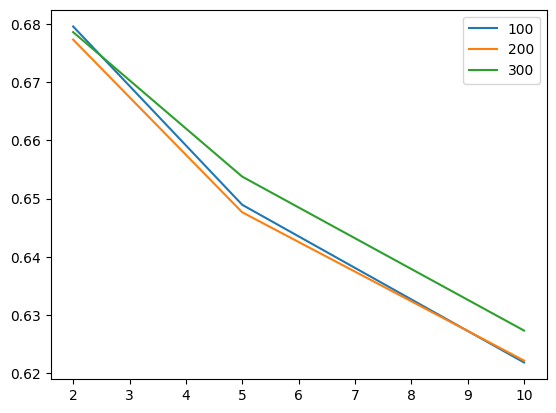

In [28]:
df.plot()